In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

from os import path
from wordcloud import (WordCloud, get_single_color_func)

In [5]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [17]:
effect_r_ASD1_TD_revision = {'default': 0.216,'default mode': 0.202,'autobiographical': 0.165,'objects': 0.164,'motor': 0.164,'primary': 0.164,'face': 0.155,'somatosensory': 0.155,'visual': 0.152,
                             'object': 0.146,'dmn': 0.146,'self referential': 0.136,'faces': 0.131,'resting': 0.129,'referential': 0.126,'theory mind': 0.125,'speech production': 0.125,'visual word': 0.124,
                             'category': 0.124,'mind': 0.123,'default network': 0.123,'resting state': 0.123,'movement': 0.123,'movements': 0.121,'selective': 0.121,'hand': 0.120,'mentalizing': 0.119,
                             'autobiographical memory': 0.119,'recognition': 0.116,'retrieval': 0.114,'social': 0.112,'memory retrieval': 0.112,'production': 0.111,'perception': 0.111,'foot': 0.11,'visual stream': 0.109,
                             'word form': 0.107,'speech': 0.104,'finger': 0.103,'supplementary': 0.101,'motor task': 0.1,'episodic': 0.100,'categories': 0.099,'perceptual': 0.098,'object recognition': 0.097,
                             'vocal': 0.095,'naming': 0.094,'face recognition': 0.094,'connectivity': 0.094,'functional connectivity': 0.091,'mental states': 0.09,'beliefs': 0.089,'orthographic': 0.088,'motor imagery': 0.083,
                             'mind tom': 0.083,'tom': 0.082,'viewing': 0.082,'written': 0.081,'motor network': 0.08,'oral': 0.079,'congruent': 0.079,'execution': 0.079,'recognize': 0.079,'memories': 0.079,'value': 0.078,
                             'listening': 0.078,'index finger': 0.078,'reading': 0.077,'handed': 0.075,'force': 0.075,'theory': 0.075,'memory': 0.073,'social cognition': 0.073,'muscle': 0.073,'arm': 0.073,'auditory': 0.072,
                             'tapping': 0.072,'recollection': 0.072,'facial': 0.071,'personal': 0.07,'finger movements': 0.068,'valence': 0.064,'retrieved': 0.063,'person': 0.063,'recognition memory': 0.062,'reward': 0.061,
                             'emotional': 0.058,'thinking': 0.057,'construction': 0.055,'episodic memory': 0.054,'moral': 0.051,'rest': 0.051,'remembering': 0.051,'positive negative': 0.051,'cognition': 0.047,'money': 0.047,
                             'social interactions': 0.046,'core': 0.046,'events': 0.045,'experiences': 0.044,'domain general': 0.043,'negative positive': 0.042}

effect_r_ASD1_TD_revision = dict(sorted(effect_r_ASD1_TD_revision.items(), reverse=True, key=lambda x: x[1]))



effect_r_ASD2_TD_revision = {'congruent':	0.288,'categories':	0.173,'visual word':	0.158,'orthographic':	0.135,'color':	0.131,'category':	0.127,'objects':	0.125,'characters':	0.122,'word form':	0.12,
                             'selective':	0.117,'fusiform face':	0.111,'readers':	0.109,'object':	0.108,'chinese':	0.106,'written':	0.106,'addition':	0.106,'reading':	0.104,'object recognition':	0.103,
                             'face':	0.102,'recognition':	0.098,'selective attention':	0.096,'visual':	0.092,'words':	0.091,'ffa':	0.09,'faces':	0.089,'face ffa':	0.089,'face recognition':	0.089,
                             'form':	0.084,'word':	0.084,'memory task':	0.082,'controls':	0.082,'attentional':	0.08,'control processes':	0.074,'categorization':	0.073,'visual stream':	0.072,'forms':	0.072,
                             'judgment':	0.071,'word recognition':	0.071,'lexical decision':	0.07,'extrastriate':	0.068,'letters':	0.063,'attentional control':	0.062,'pseudowords':	0.062,'repetition':	0.06,
                             'viewing':	0.06,'place':	0.059,'expertise':	0.058,'english':	0.054,'subsequent memory': 0.054,'recognize':	0.053,'difficulty':	0.053,'item':	0.052,'read':	0.052,'match':	0.051,'gain':	0.05,
                             'wm':	0.05,'rehearsal':	0.048,'articulatory':	0.048,'arithmetic':	0.047,'vocal':	0.045,'resting':	0.044,'eye field':	0.042,'resting state':	0.042,'interference':	0.042,'familiar':	0.04,
                             'music':	0.04,'memory wm':	0.039,'disorder':	0.039,'musical':	0.039,'rule':	0.039,'phonological':	0.039,'unfamiliar':	0.038,'performance':	0.037,'perception':	0.037,'demand':	0.037,
                             'languages':	0.036,'motor':	0.035,'congruent incongruent':	0.035,'encoding':	0.035,'lexical':	0.034,'suffering':	0.034,'visual attention':	0.034,'frontal eye':	0.033,'control task':	0.033,
                             'audiovisual':	0.033,'sustained':	0.033,'visually presented':	0.032,'spatial':	0.032,'semantic':	0.032,'negative':	0.032,'speech':	0.03,'verbal working':	0.03,'social':	0.028,'eye':	0.028,
                             'eye movement':	0.028,'eye movements':	0.027,'maintenance':	0.027,'manual':	0.025,'motor cortex':	0.024, 'production':	0.024}

effect_r_ASD2_TD_revision = dict(sorted(effect_r_ASD2_TD_revision.items(), reverse=True, key=lambda x: x[1]))



effect_r_ASD3_TD_revision = {'relational':	0.153,'selective attention':	0.126,'spatial attention':	0.1,'gaze':	0.09,'perceptual':	0.073,'spatial':	0.065,'location':	0.055,'eye':	0.052,'hypoactivation':	0.045,
                             'visual':	0.045,'character':	0.044,'visuomotor':	0.04,'eye fields':	0.039,'attention':	0.031,'word form':	0.029,'visual cortex':	0.025,'frontal eye':	0.025,'covert':	0.025,'unimodal':	0.022,
                             'visual motion':	0.022,'visuo':	0.019,'hands':	0.018,'visual word':	0.017,'vision':	0.017,'eye field':	0.016,'visually':	0.015,'motion':	0.013,'navigation':	0.008,'visual field':	0.006,
                             'cerebellum':	0.006,'autobiographical':	0.005,'sensorimotor':	0.005,'retrieval':	0.005,'motor cortex':	0.005,'movements':	0.005,'motor':	0.005,'movement':	0.005,'episodic':	0.004,'vi':	0.004,
                             'pain':	0.004,'finger movements':	0.004,'memory':	0.004,'imagery':	0.004,'motor imagery':	0.004,'finger':	0.004,'noxious':	0.004,'tasks':	0.004,'temporal':	0.004,'hand':	0.004,'task':	0.004,
                             'vermis':	0.004,'semantic':	0.004,'phonological':	0.004,'supplementary':	0.004,'execution':	0.004,'orienting':	0.003,'reading':	0.003,'retrieved':	0.003,'mind tom':	0.003,'mind':	0.003,
                             'language':	0.003,'linguistic':	0.003,'vocal':	0.003,'auditory':	0.003,'theory mind':	0.003,'tactile':	0.003,'motor task':	0.003,'muscle':	0.003,'social':	0.003,'handed':	0.003,'speech':	0.003,
                             'listening':	0.003,'action':	0.003,'motor performance':	0.003,'default':	0.003,'encoding':	0.003,'default network':	0.003,'words':	0.003,'gain':	0.003,'finger tapping':	0.003,'spoken': 0.003,
                             'demands':	0.003,'tom':	0.003,'episodic memory':	0.003,'locations':	0.002,'mental imagery':	0.001,'controls':	0.001,'disorder':	0.001,'resting':	0.011,'resting state':	0.01}


effect_r_ASD3_TD_revision = dict(sorted(effect_r_ASD3_TD_revision.items(), reverse=True, key=lambda x: x[1]))


In [8]:
x, y = np.ogrid[:1600, :1600]
mask = (x - 800) ** 2 + ((y - 800) ** 2)/3 > 500 ** 2
mask = 255 * mask.astype(int)
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

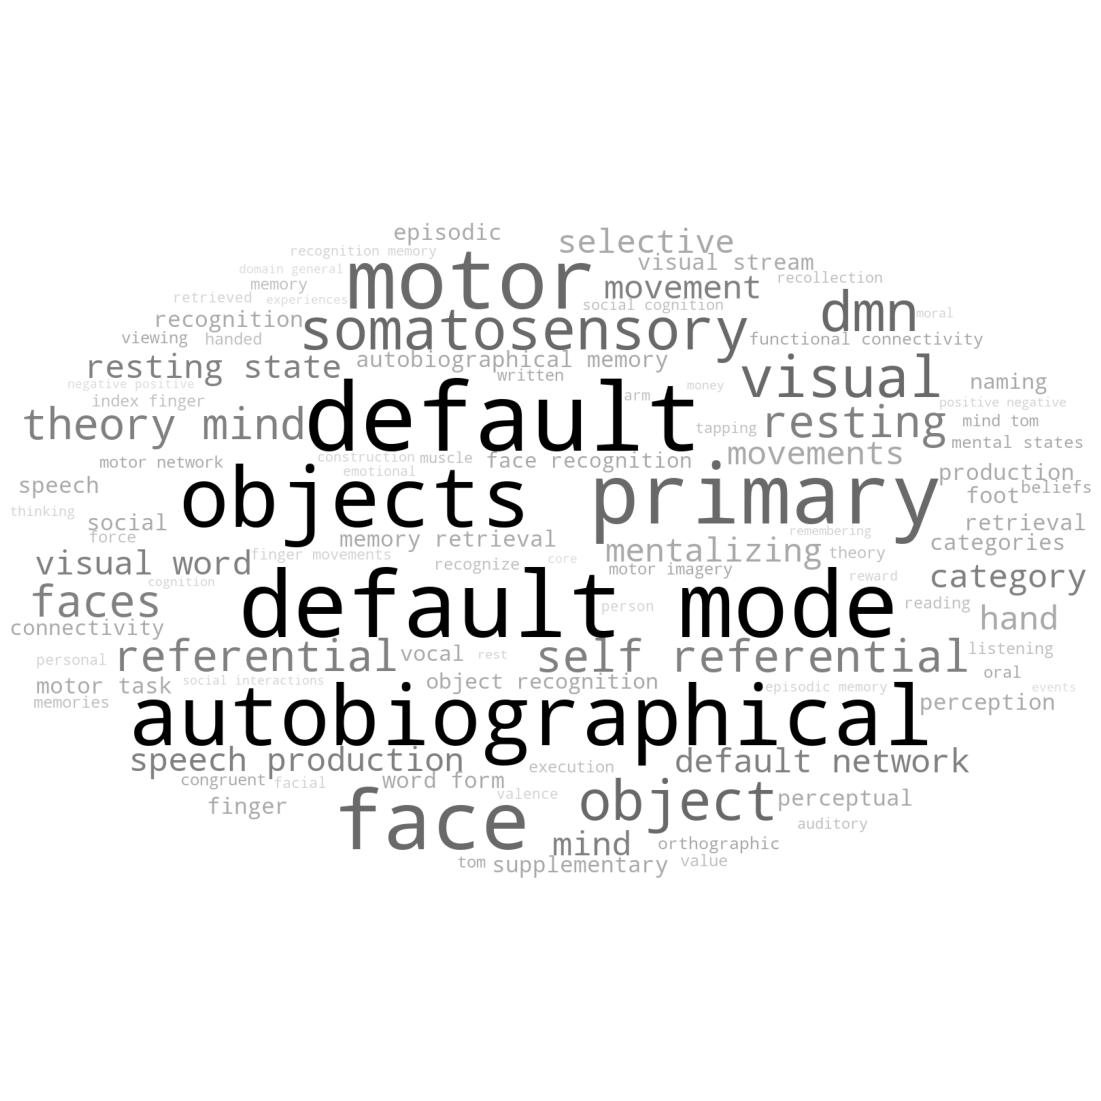

In [21]:
# Generate a word cloud image
# colormap_list = ['Greys', 'gist_yarg', 'gist_gray', 'gray', 'binary', 'gist_yarg']
for i,x in enumerate([effect_r_ASD1_TD_revision]):    
    wordcloud = WordCloud(max_font_size=140, prefer_horizontal = 1, width = 2000, height = 1800, background_color = 'white', colormap=None, mask=mask).generate_from_frequencies(x)
    
    color_to_words  = {'black' : list(x.keys())[ : int(len(x)*0.04)],
                       'dimgrey' : list(x.keys())[int(len(x)*0.04) : int(len(x)*0.11)],
                       'grey' : list(x.keys())[int(len(x)*0.11) : int(len(x)*0.23)],
                       'darkgray' : list(x.keys())[int(len(x)*0.23) : int(len(x)*0.40)],
                       'darkgrey' : list(x.keys())[int(len(x)*0.40) : int(len(x)*0.60)],
                       'silver' : list(x.keys())[int(len(x)*0.60) : int(len(x)*0.77)],
                       'lightgray' : list(x.keys())[int(len(x)*0.77) : int(len(x)*0.89)],
                       'lightgrey' : list(x.keys())[int(len(x)*0.89) : int(len(x)*0.96)],
                       'gainsboro' : list(x.keys())[int(len(x)*0.96) : ]}
    default_color = 'white'
    
    grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
    wordcloud.recolor(color_func=grouped_color_func)


    # Display the generated image:
    # the matplotlib way:
    plt.figure(i, (20,20))
    plt.imshow(wordcloud)
    plt.axis("off")
